In [22]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

Read in the Kobe Bryant shooting data [https://www.kaggle.com/c/kobe-bryant-shot-selection]

In [24]:
kobe = pd.read_csv('../data/kobe.csv')
kobe.dropna(inplace=True)
[(col, dtype) for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns = [col for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']

# fit a linear regression model and store the predictions
feature_cols = ['shot_distance', 'minutes_remaining']
X = kobe[feature_cols] #kobe[['shot_distance', 'minutes_remaining']]
y = kobe.shot_made_flag

0.597190333502
[[10626  3606]
 [ 6745  4720]]
             precision    recall  f1-score   support

        0.0       0.61      0.75      0.67     14232
        1.0       0.57      0.41      0.48     11465

avg / total       0.59      0.60      0.59     25697



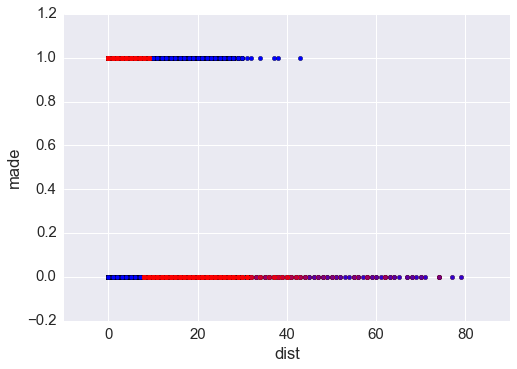

In [28]:
# from sklearn.linear_model import LinearRegression as Model
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()
model.fit(X, y)
pred = model.predict(X)
# scatter plot that includes the regression line
plt.scatter(kobe.shot_distance, kobe.shot_made_flag)
plt.scatter(kobe.shot_distance, pred, color='red', alpha=.2)
plt.xlabel('dist')
plt.ylabel('made')

print(accuracy_score(kobe.shot_made_flag, pred.round()))
print(confusion_matrix(kobe.shot_made_flag, pred.round()))
print(classification_report(kobe.shot_made_flag, pred.round()))


In [29]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.metrics import *
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

cross_validation.cross_val_score(model, X, y, cv=10)


array([ 0.59237651,  0.59354337,  0.59299611,  0.59688716,  0.61750973,
        0.58388478,  0.60334761,  0.60918645,  0.60140132,  0.58388478])